# Import Dataset

In [ ]:
# Import Library Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crudeoil.csv to crudeoil.csv


In [ ]:
# set variabel dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['crudeoil.csv']))
df

,Date,Price,Open,High,Low,Vol.,Change %
0,4-Jan-16,36.76,37.60,38.39,36.33,431.99K,-0.76%
1,5-Jan-16,35.97,36.90,37.10,35.74,410.13K,-2.15%
2,6-Jan-16,33.97,36.18,36.39,33.77,563.81K,-5.56%
3,7-Jan-16,33.27,34.09,34.26,32.10,617.41K,-2.06%
4,8-Jan-16,33.16,33.30,34.34,32.64,596.50K,-0.33%
...,...,...,...,...,...,...,...
1314,24-Dec-20,48.23,48.09,48.62,47.56,167.39K,0.23%
1315,28-Dec-20,47.62,48.23,48.96,47.50,238.46K,-1.26%
1316,29-Dec-20,48.00,47.72,48.35,47.68,213.78K,0.80%
1317,30-Dec-20,48.40,48.13,48.66,47.61,266.96K,0.83%


In [ ]:
# set index dataset
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-01-04,36.76,37.60,38.39,36.33,431.99K,-0.76%
2016-01-05,35.97,36.90,37.10,35.74,410.13K,-2.15%
2016-01-06,33.97,36.18,36.39,33.77,563.81K,-5.56%
2016-01-07,33.27,34.09,34.26,32.10,617.41K,-2.06%
2016-01-08,33.16,33.30,34.34,32.64,596.50K,-0.33%
...,...,...,...,...,...,...
2020-12-24,48.23,48.09,48.62,47.56,167.39K,0.23%
2020-12-28,47.62,48.23,48.96,47.50,238.46K,-1.26%
2020-12-29,48.00,47.72,48.35,47.68,213.78K,0.80%


# Cleaning dataset

## Resampling Data into 7 Days a Week

In [ ]:
# resample dataset menjadi data harian senin-minggu
df = df.Price.resample('D').mean()
df = df.to_frame()
df

,Price
Date,
2016-01-04,36.76
2016-01-05,35.97
2016-01-06,33.97
2016-01-07,33.27
2016-01-08,33.16
...,...
2020-12-27,NaN
2020-12-28,47.62
2020-12-29,48.00


## Missing Value Treatment

In [ ]:
# pengecekan missing value setelah resample
df.isnull().sum()

Price    505
dtype: int64

In [ ]:
# mengisi missing value dengan menggunakan rata - rata pada minggu tersebut
def fill_missing():
  for x in range(df.shape[0]):
    if np.isnan(df['Price'][x]) == True:
      df['Price'][x] = (df['Price'][x-5]+df['Price'][x-4]+df['Price'][x-3]+df['Price'][x-2]+df['Price'][x-1])/5

fill_missing()

In [ ]:
# pengecekan missing value setelah mengisi missing value dengan rata rata pada minggu tersebut
df.isnull().sum()

Price    0
dtype: int64

In [ ]:
df.describe()

,Price
count,1824.000000
mean,51.190222
std,11.317265
min,10.010000
25%,44.789000
50%,51.495000
75%,58.482500
max,76.410000


## Outlier Treatment

In [ ]:
# melakukan treatment pada outlier
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(df.Price)

In [ ]:
# Cek data yang menjadi outlier
df[(df['Price'] < lowerbound) | (df['Price'] > upperbound)].shape

(45, 1)

In [ ]:
# df.drop(df[(df.Price < lowerbound) | (df.Price > upperbound)].index , inplace=True)
# df

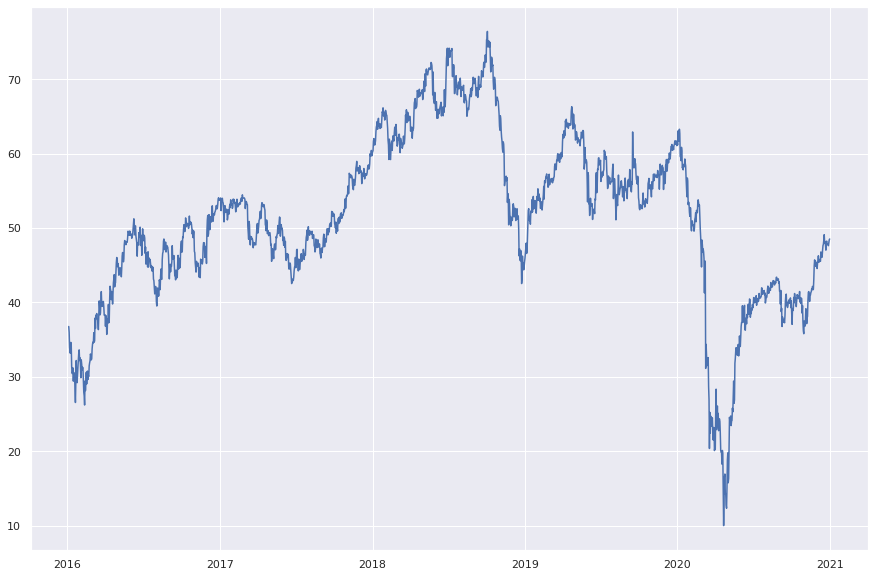

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(df['Price'])

# Data Processing

In [ ]:
df = df.filter(['Date', 'Price'])
df

,Price
Date,
2016-01-04,36.760000
2016-01-05,35.970000
2016-01-06,33.970000
2016-01-07,33.270000
2016-01-08,33.160000
...,...
2020-12-27,47.804109
2020-12-28,47.620000
2020-12-29,48.000000


## Differencing

In [ ]:
df['first_difference'] = df['Price'] - df['Price'].shift(1)
df['second_difference'] = df['Price'] - df['Price'].shift(2)
df

,Price,first_difference,second_difference
Date,,,
2016-01-04,36.760000,NaN,NaN
2016-01-05,35.970000,-0.790000,NaN
2016-01-06,33.970000,-2.000000,-2.790000
2016-01-07,33.270000,-0.700000,-2.700000
2016-01-08,33.160000,-0.110000,-0.810000
...,...,...,...
2020-12-27,47.804109,0.010685,-0.053011
2020-12-28,47.620000,-0.184109,-0.173424
2020-12-29,48.000000,0.380000,0.195891


## Plotting ACF and PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


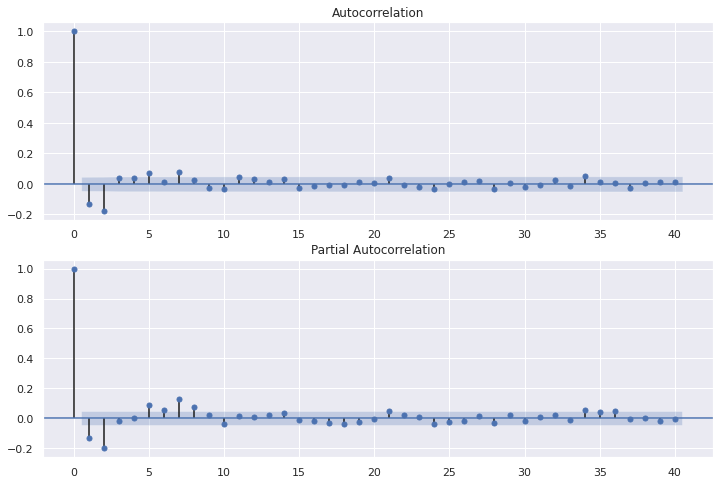

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['first_difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['first_difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
df = df.filter(['Date', 'Price'])
df

,Price
Date,
2016-01-04,36.760000
2016-01-05,35.970000
2016-01-06,33.970000
2016-01-07,33.270000
2016-01-08,33.160000
...,...
2020-12-27,47.804109
2020-12-28,47.620000
2020-12-29,48.000000


# ARIMA

## Splitting Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X = df

X_train, X_test= train_test_split(X, test_size = 0.2, shuffle=False)

## Building ARIMA Model

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


## Creating MAPE and RMSE Function

In [ ]:
# membuat fungsi untuk menghitung MAPE dan RMSE
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100
def rmse(actual, pred):
    return np.sqrt(((actual - pred) ** 2).mean())

# ARIMA Results

In [ ]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))

            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:19611.916169107826
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:17121.021907569946
ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:8510.096451685024
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:8406.425268573686
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:8520.178084776915


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:8449.534632706695
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:8406.582459360976
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:8404.770155992377
ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:17131.20375866985
ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:15042.50818805425
ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:7406.407616564035
ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:7375.32843518647
ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:7422.852623080373


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:7422.465303985589
ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:7383.167857928343
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:7377.306243558969
ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:5826.003429460523
ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:5792.1570261788875
ARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:6922.710877839261
ARIMA(0, 1, 0)x(0, 1, 1, 7) - AIC:5822.23524758605
ARIMA(0, 1, 0)x(1, 0, 0, 7) - AIC:5794.449134706881
ARIMA(0, 1, 0)x(1, 0, 1, 7) - AIC:5793.334009328695
ARIMA(0, 1, 0)x(1, 1, 0, 7) - AIC:6441.105947222391
ARIMA(0, 1, 0)x(1, 1, 1, 7) - AIC:5814.607972004134
ARIMA(0, 1, 1)x(0, 0, 0, 7) - AIC:5770.771094468073
ARIMA(0, 1, 1)x(0, 0, 1, 7) - AIC:5733.004842775024
ARIMA(0, 1, 1)x(0, 1, 0, 7) - AIC:6822.037197859849
ARIMA(0, 1, 1)x(0, 1, 1, 7) - AIC:5769.518465926172
ARIMA(0, 1, 1)x(1, 0, 0, 7) - AIC:5736.859960390046
ARIMA(0, 1, 1)x(1, 0, 1, 7) - AIC:5733.281318341105
ARIMA(0, 1, 1)x(1, 1, 0, 7) - AIC:6376.364249813544
ARIMA(0, 1, 1)x(1, 1, 1, 7) - AIC:5752.670654922509
ARIMA(1, 0, 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 7) - AIC:5812.075160542708
ARIMA(1, 0, 1)x(0, 0, 0, 7) - AIC:5777.724885127373
ARIMA(1, 0, 1)x(0, 0, 1, 7) - AIC:5737.2123092936035
ARIMA(1, 0, 1)x(0, 1, 0, 7) - AIC:6706.7162200336925
ARIMA(1, 0, 1)x(0, 1, 1, 7) - AIC:5770.505382959774
ARIMA(1, 0, 1)x(1, 0, 0, 7) - AIC:5738.851161083613
ARIMA(1, 0, 1)x(1, 0, 1, 7) - AIC:5737.660700752038
ARIMA(1, 0, 1)x(1, 1, 0, 7) - AIC:6308.986666133439
ARIMA(1, 0, 1)x(1, 1, 1, 7) - AIC:5753.996098878293
ARIMA(1, 1, 0)x(0, 0, 0, 7) - AIC:5795.423141033664
ARIMA(1, 1, 0)x(0, 0, 1, 7) - AIC:5757.624616233522
ARIMA(1, 1, 0)x(0, 1, 0, 7) - AIC:6872.332395273188
ARIMA(1, 1, 0)x(0, 1, 1, 7) - AIC:5792.081999415809
ARIMA(1, 1, 0)x(1, 0, 0, 7) - AIC:5757.083409331355
ARIMA(1, 1, 0)x(1, 0, 1, 7) - AIC:5758.581468122818
ARIMA(1, 1, 0)x(1, 1, 0, 7) - AIC:6401.954219730782
ARIMA(1, 1, 0)x(1, 1, 1, 7) - AIC:5780.267992441386
ARIMA(1, 1, 1)x(0, 0, 0, 7) - AIC:5752.028399183771
ARIMA(1, 1, 1)x(0, 0, 1, 7) - AIC:5712.750152150673
ARIMA(1, 1

In [ ]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum:
        minimum = i
i=l_results_aic.index(minimum)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Price   No. Observations:                 1824
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 7)   Log Likelihood               -2852.375
Date:                           Fri, 11 Feb 2022   AIC                           5712.750
Time:                                   05:40:21   BIC                           5734.763
Sample:                               01-04-2016   HQIC                          5720.873
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2950      0.082      3.587      0.000       0.134       0.456
ma.L1         -0.5013      0.074     -6.763

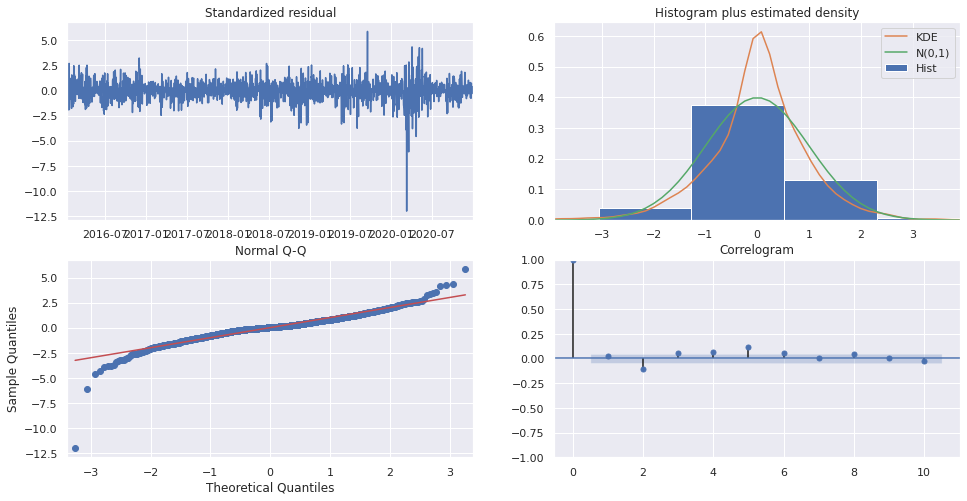

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Plotting Actual Data and Prediction

In [ ]:
pred_total = results.get_prediction(start=pd.to_datetime('2016-01-04'), dynamic=False)

In [ ]:
pred_total_arima = pd.DataFrame(pred_total.predicted_mean, columns = ['Forecast'])
pred_total_arima

,Forecast
Date,
2016-01-04,0.000000
2016-01-05,42.181890
2016-01-06,35.736963
2016-01-07,33.380024
2016-01-08,33.063508
...,...
2020-12-27,47.831869
2020-12-28,47.766056
2020-12-29,47.578592


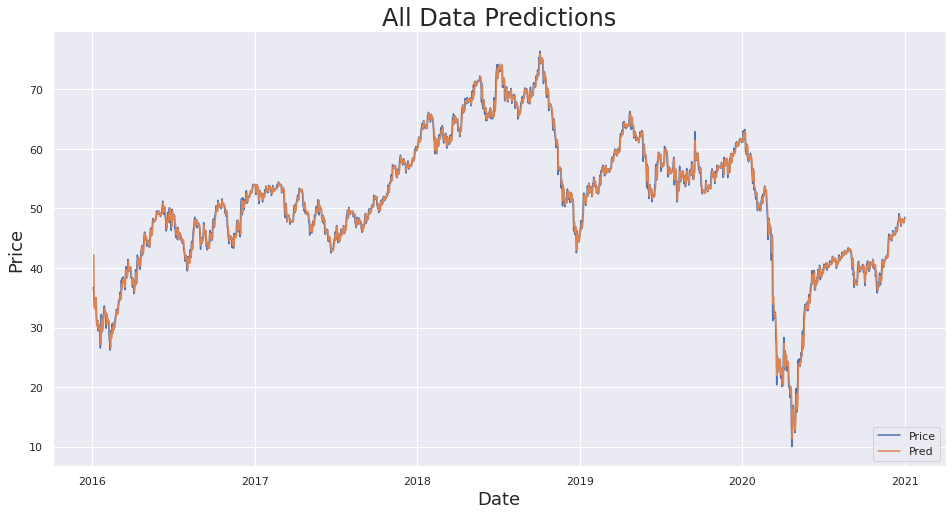

In [ ]:
plt.figure(figsize=(16,8))
plt.title('All Data Predictions', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(df)
plt.plot(pred_total_arima[1:])
plt.legend(['Price', 'Pred'], loc='lower right')
plt.show()

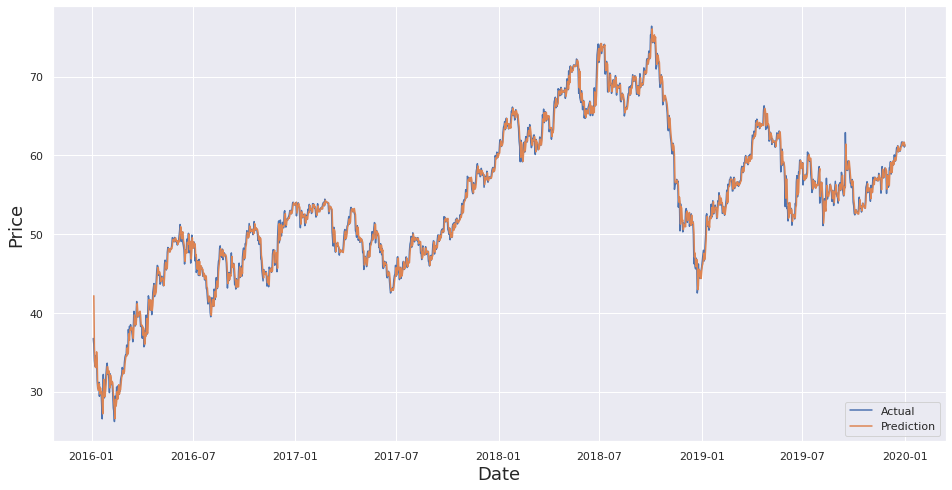

In [ ]:
plt.figure(figsize=(16,8))
# plt.title('Data Training Predictions', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(X_train)
plt.plot(pred_total_arima[1:1459])
plt.legend(['Actual', 'Prediction'], loc='lower right')
plt.show()

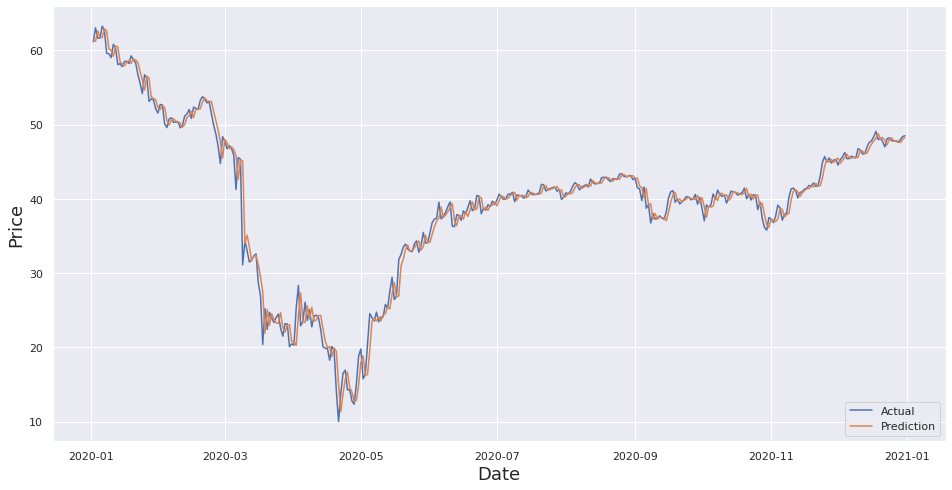

In [ ]:
plt.figure(figsize=(16,8))
# plt.title('Data Training Predictions', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(X_test)
plt.plot(pred_total_arima[1459:])
plt.legend(['Actual', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
pred_train_arima = pd.DataFrame(pred_total.predicted_mean[:1459], columns = ['Forecast'])
pred_train_arima

,Forecast
Date,
2016-01-04,0.000000
2016-01-05,42.181890
2016-01-06,35.736963
2016-01-07,33.380024
2016-01-08,33.063508
...,...
2019-12-28,61.669091
2019-12-29,61.316399
2019-12-30,61.352704


In [ ]:
pred_test_arima = pd.DataFrame(pred_total.predicted_mean[1459:], columns = ['Forecast'])
pred_test_arima

,Forecast
Date,
2020-01-02,61.373082
2020-01-03,61.231064
2020-01-04,62.637323
2020-01-05,61.767257
2020-01-06,61.738519
...,...
2020-12-27,47.831869
2020-12-28,47.766056
2020-12-29,47.578592


## Evaluating Model

In [ ]:
mape_train_arima = mape(X_train['Price'], pred_train_arima['Forecast'])
print("MAPE TRAIN ARIMA: ", round(mape_train_arima,2), "%")

MAPE TRAIN ARIMA:  1.54 %


In [ ]:
rmse_train_arima = rmse(X_train['Price'], pred_train_arima['Forecast'])
print("RMSE TRAIN ARIMA: ", round(rmse_train_arima,2))

RMSE TRAIN ARIMA:  1.43


In [ ]:
mape_test_arima = mape(X_test['Price'], pred_test_arima['Forecast'])
print("MAPE TEST ARIMA: ", round(mape_test_arima,2), "%")

MAPE TEST ARIMA:  3.14 %


In [ ]:
rmse_test_arima = rmse(X_test['Price'], pred_test_arima['Forecast'])
print("RMSE TEST ARIMA: ", round(rmse_test_arima,2))

RMSE TEST ARIMA:  1.57


In [ ]:
mape_arima = mape(df['Price'],pred_total_arima['Forecast'])
print("MAPE ARIMA: ", round(mape_arima,2), "%")

MAPE ARIMA:  1.86 %


In [ ]:
rmse_arima = rmse(df['Price'],pred_total_arima['Forecast'])
print("RMSE ARIMA: ", round(rmse_arima,2))

RMSE ARIMA:  1.46


## Output Residual ARIMA

In [ ]:
df_residu = df['Price'] - pred_total_arima['Forecast']
df_residu = pd.DataFrame(df_residu)
df_residu.columns = ['Residu']
df_residu

,Residu
Date,
2016-01-04,36.760000
2016-01-05,-6.211890
2016-01-06,-1.766963
2016-01-07,-0.110024
2016-01-08,0.096492
...,...
2020-12-27,-0.027761
2020-12-28,-0.146056
2020-12-29,0.421408


## Output Prediction 1 Year Ahead using ARIMA

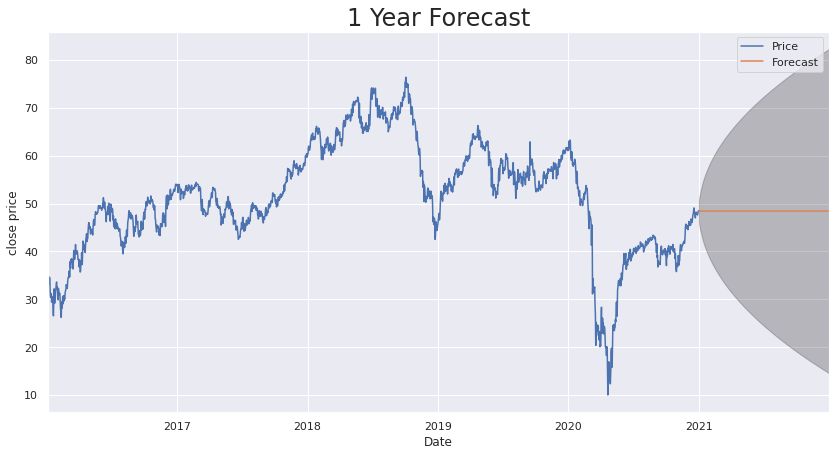

In [ ]:
pred_uc = results.get_forecast(steps=365)
pred_ci = pred_uc.conf_int()

ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.title('1 Year Forecast', fontsize=24)
plt.legend()
plt.show()

# BPNN

## Preprocessing Output Residual ARIMA

In [ ]:
df_residu.isnull().sum()

Residu    0
dtype: int64

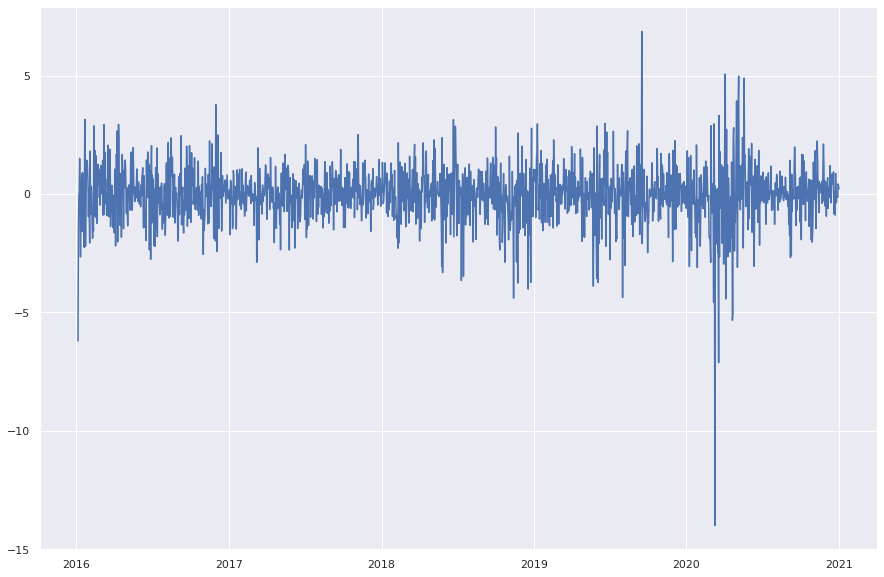

In [ ]:
plt.plot(df_residu[1:])

## Scaling Output Residual ARIMA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit_transform(df_residu)
scaled_data = scaler.transform(df_residu)
scaled_data

array([[1.        ],
       [0.15355942],
       [0.24111355],
       ...,
       [0.28421908],
       [0.2832738 ],
       [0.28011564]])

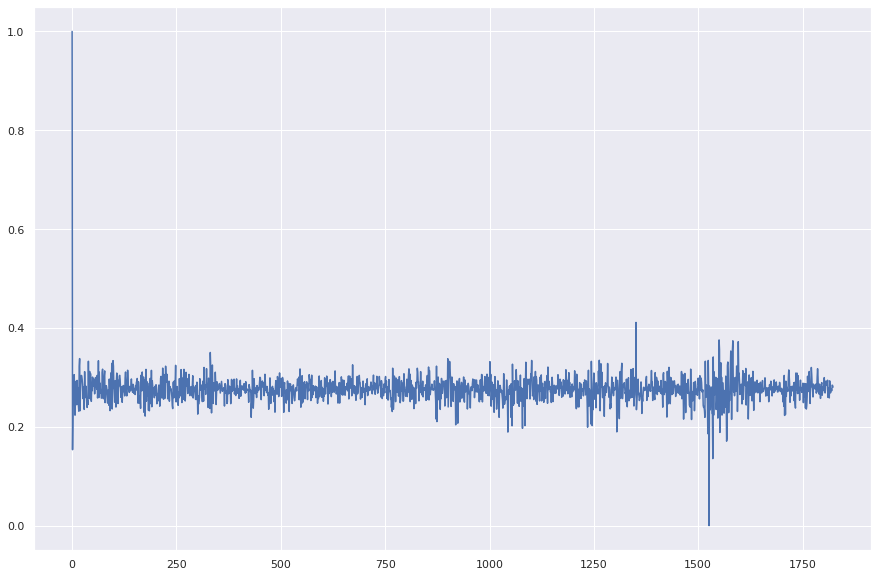

In [ ]:
plt.plot(scaled_data)

## Splitting Data into Train and Test

In [ ]:
# split into train and test sets (80:20)
from sklearn.model_selection import train_test_split

train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]
print(len(train), len(test))

1459 365


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# mencoba lookback lain
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

## Building BPNN Model

In [ ]:
# mencoba aktivasi lain dan jumlah neuron lain jadikan skenario
# mencoba parameter bias
from keras.models import Sequential
import tensorflow as tf #backpropagation
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(tf.keras.layers.Dense(7, activation='relu', input_dim=1))  #hidden layer
model.add(tf.keras.layers.Dense(1)) #output layer

model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0208
Epoch 2/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0167
Epoch 3/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0164
Epoch 4/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0161
Epoch 5/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0164
Epoch 6/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0160
Epoch 7/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0161
Epoch 8/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0159
Epoch 9/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0159
Epoch 10/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0159
Epoch 11/100
1457/1457 [==============================] - 2s 1ms/step - loss: 0.0160
Epoch 12/100
1457/1457 [==============================] - 2s 1ms/step - lo

## BPNN Model Illustration

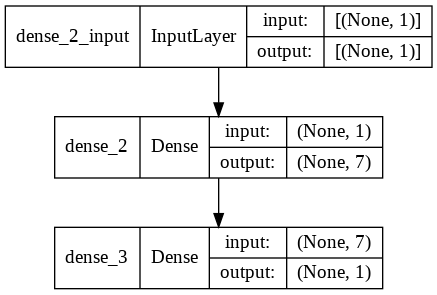

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
testY = pd.DataFrame(testY, columns=['Test'])
trainY = pd.DataFrame(trainY, columns=['Train'])

In [ ]:
testY = scaler.inverse_transform(testY)
trainY = scaler.inverse_transform(trainY)

In [ ]:
prediction = scaler.inverse_transform(model.predict(testX))
prediction

array([[-0.08399931],
       [-0.05057267],
       [-0.09702773],
       [-0.08263913],
       [-0.0553492 ],
       [-0.08419298],
       [-0.1317722 ],
       [-0.0915991 ],
       [-0.09765714],
       [-0.05384831],
       [-0.08477851],
       [-0.12063351],
       [-0.08560007],
       [-0.0861856 ],
       [-0.07105714],
       [-0.07795943],
       [-0.08791798],
       [-0.06401716],
       [-0.08278892],
       [-0.08708129],
       [-0.10832831],
       [-0.10705134],
       [-0.11138154],
       [-0.04789618],
       [-0.08460149],
       [-0.13248785],
       [-0.08498579],
       [-0.08471194],
       [-0.10059538],
       [-0.09285035],
       [-0.06932324],
       [-0.0801215 ],
       [-0.11743958],
       [-0.09711397],
       [-0.06740931],
       [-0.07463538],
       [-0.08894833],
       [-0.0830083 ],
       [-0.0807615 ],
       [-0.09117546],
       [-0.0760001 ],
       [-0.06183845],
       [-0.07311179],
       [-0.06662255],
       [-0.09722442],
       [-0

## Evaluating Model

In [ ]:
rmse_bpnn = rmse(testY, prediction)
print("RMSE BPNN: ", round(rmse_bpnn,2))

RMSE BPNN:  1.58


In [ ]:
prediction_total = model.predict(df_residu)
prediction_total.shape

(1824, 1)

In [ ]:
prediction_total = pd.DataFrame(prediction_total, columns=['Forecast'])
prediction_total

,Forecast
0,-5.447815
1,-0.703022
2,-0.023949
3,0.251456
4,0.271346
...,...
1819,0.265129
1820,0.245467
1821,0.263570
1822,0.271122


In [ ]:
df_residu_copy = df_residu.copy()

In [ ]:
prediction_total.dtypes

Forecast    float32
dtype: object

In [ ]:
df_residu_copy['Forecast_Residu'] = prediction_total

In [ ]:
predtotal = scaler.inverse_transform(scaled_data)
predtotal = model.predict(predtotal)
predtotal

array([[-5.4478154 ],
       [-0.70302224],
       [-0.02394912],
       ...,
       [ 0.26356953],
       [ 0.2711222 ],
       [ 0.27328312]], dtype=float32)

In [ ]:
df_residu_copy['Forecast_Residu'] = predtotal

In [ ]:
df_residu_copy

,Residu,Forecast_Residu
Date,,
2016-01-04,36.760000,-5.447815
2016-01-05,-6.211890,-0.703022
2016-01-06,-1.766963,-0.023949
2016-01-07,-0.110024,0.251456
2016-01-08,0.096492,0.271346
...,...,...
2020-12-27,-0.027761,0.265129
2020-12-28,-0.146056,0.245467
2020-12-29,0.421408,0.263570


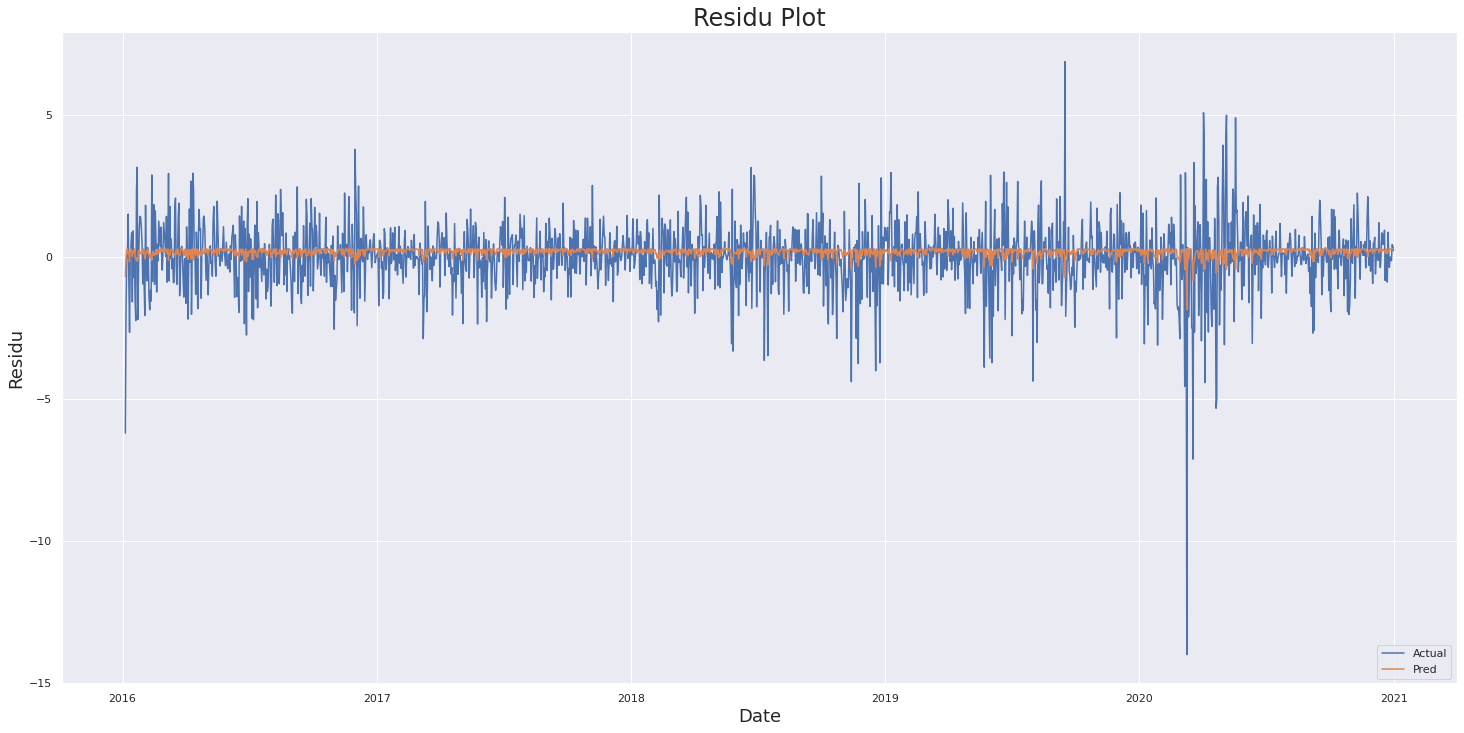

In [ ]:
plt.figure(figsize=(25,12))
plt.title('Residu Plot', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Residu', fontsize=18)
plt.plot(df_residu_copy['Residu'][1:])
plt.plot(df_residu_copy['Forecast_Residu'][1:])
plt.legend(['Actual', 'Pred'], loc='lower right')
plt.show()

## Output Prediction 1 Year Ahead using BPNN

In [ ]:
forecast = model.predict(df_residu_copy['Residu'][0:365], steps=365)
forecast.shape

(365, 1)

In [ ]:
forecast = pd.DataFrame(forecast, columns=['Forecast_ARIMA'])
forecast

,Forecast_ARIMA
0,-5.447815
1,-0.703022
2,-0.023949
3,0.251456
4,0.271346
...,...
360,0.234286
361,0.260475
362,0.270386
363,0.271430


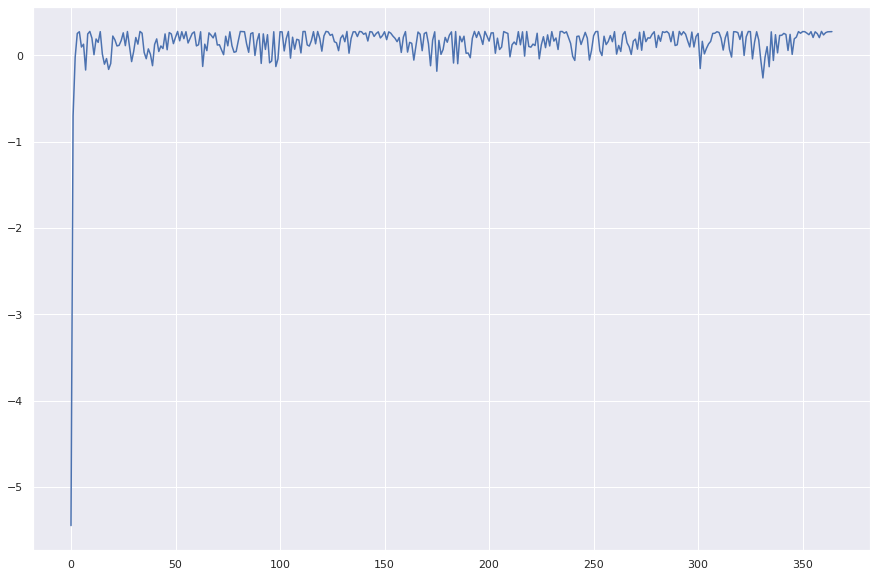

In [ ]:
plt.plot(forecast)

# Hybrid ARIMA - BPNN

## Forecast Hybrid ARIMA - BPNN

In [ ]:
forecast_hybrid = pd.DataFrame(pred_uc.predicted_mean, columns=['Forecast_ARIMA'])
forecast_hybrid

,Forecast_ARIMA
2021-01-01,48.403784
2021-01-02,48.385964
2021-01-03,48.378836
2021-01-04,48.364051
2021-01-05,48.407162
...,...
2021-12-27,48.436265
2021-12-28,48.436265
2021-12-29,48.436265
2021-12-30,48.436265


In [ ]:
forecast_hybrid.reset_index(inplace=True)
forecast_hybrid

,index,Forecast_ARIMA
0,2021-01-01,48.403784
1,2021-01-02,48.385964
2,2021-01-03,48.378836
3,2021-01-04,48.364051
4,2021-01-05,48.407162
...,...,...
360,2021-12-27,48.436265
361,2021-12-28,48.436265
362,2021-12-29,48.436265
363,2021-12-30,48.436265


In [ ]:
forecast_hybrid['Forecast_BPNN'] = pd.DataFrame(forecast, columns=['Forecast_ARIMA'])
forecast_hybrid

,index,Forecast_ARIMA,Forecast_BPNN
0,2021-01-01,48.403784,-5.447815
1,2021-01-02,48.385964,-0.703022
2,2021-01-03,48.378836,-0.023949
3,2021-01-04,48.364051,0.251456
4,2021-01-05,48.407162,0.271346
...,...,...,...
360,2021-12-27,48.436265,0.234286
361,2021-12-28,48.436265,0.260475
362,2021-12-29,48.436265,0.270386
363,2021-12-30,48.436265,0.271430


In [ ]:
forecast_hybrid.set_index('index', inplace=True)
forecast_hybrid

,Forecast_ARIMA,Forecast_BPNN
index,,
2021-01-01,48.403784,-5.447815
2021-01-02,48.385964,-0.703022
2021-01-03,48.378836,-0.023949
2021-01-04,48.364051,0.251456
2021-01-05,48.407162,0.271346
...,...,...
2021-12-27,48.436265,0.234286
2021-12-28,48.436265,0.260475
2021-12-29,48.436265,0.270386


In [ ]:
forecast_hybrid['Forecast_Hybrid'] = forecast_hybrid['Forecast_ARIMA'] + forecast_hybrid['Forecast_BPNN']
forecast_hybrid

,Forecast_ARIMA,Forecast_BPNN,Forecast_Hybrid
index,,,
2021-01-01,48.403784,-5.447815,42.955969
2021-01-02,48.385964,-0.703022,47.682942
2021-01-03,48.378836,-0.023949,48.354887
2021-01-04,48.364051,0.251456,48.615507
2021-01-05,48.407162,0.271346,48.678508
...,...,...,...
2021-12-27,48.436265,0.234286,48.670551
2021-12-28,48.436265,0.260475,48.696740
2021-12-29,48.436265,0.270386,48.706651


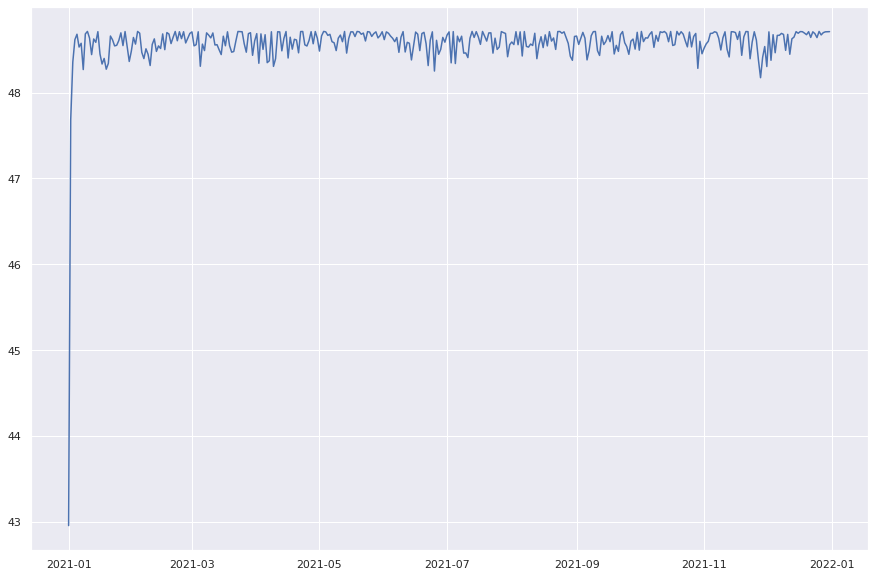

In [ ]:
plt.plot(forecast_hybrid['Forecast_Hybrid'])

In [ ]:
df_residu_copy

,Residu,Forecast_Residu
Date,,
2016-01-04,36.760000,-5.447815
2016-01-05,-6.211890,-0.703022
2016-01-06,-1.766963,-0.023949
2016-01-07,-0.110024,0.251456
2016-01-08,0.096492,0.271346
...,...,...
2020-12-27,-0.027761,0.265129
2020-12-28,-0.146056,0.245467
2020-12-29,0.421408,0.263570


In [ ]:
df_forecast = df.copy()
df_forecast

,Price
Date,
2016-01-04,36.760000
2016-01-05,35.970000
2016-01-06,33.970000
2016-01-07,33.270000
2016-01-08,33.160000
...,...
2020-12-27,47.804109
2020-12-28,47.620000
2020-12-29,48.000000


In [ ]:
df_forecast['Forecast'] = pred_total_arima['Forecast'] + df_residu_copy['Forecast_Residu']
df_forecast

,Price,Forecast
Date,,
2016-01-04,36.760000,-5.447815
2016-01-05,35.970000,41.478868
2016-01-06,33.970000,35.713014
2016-01-07,33.270000,33.631480
2016-01-08,33.160000,33.334854
...,...,...
2020-12-27,47.804109,48.096998
2020-12-28,47.620000,48.011523
2020-12-29,48.000000,47.842162


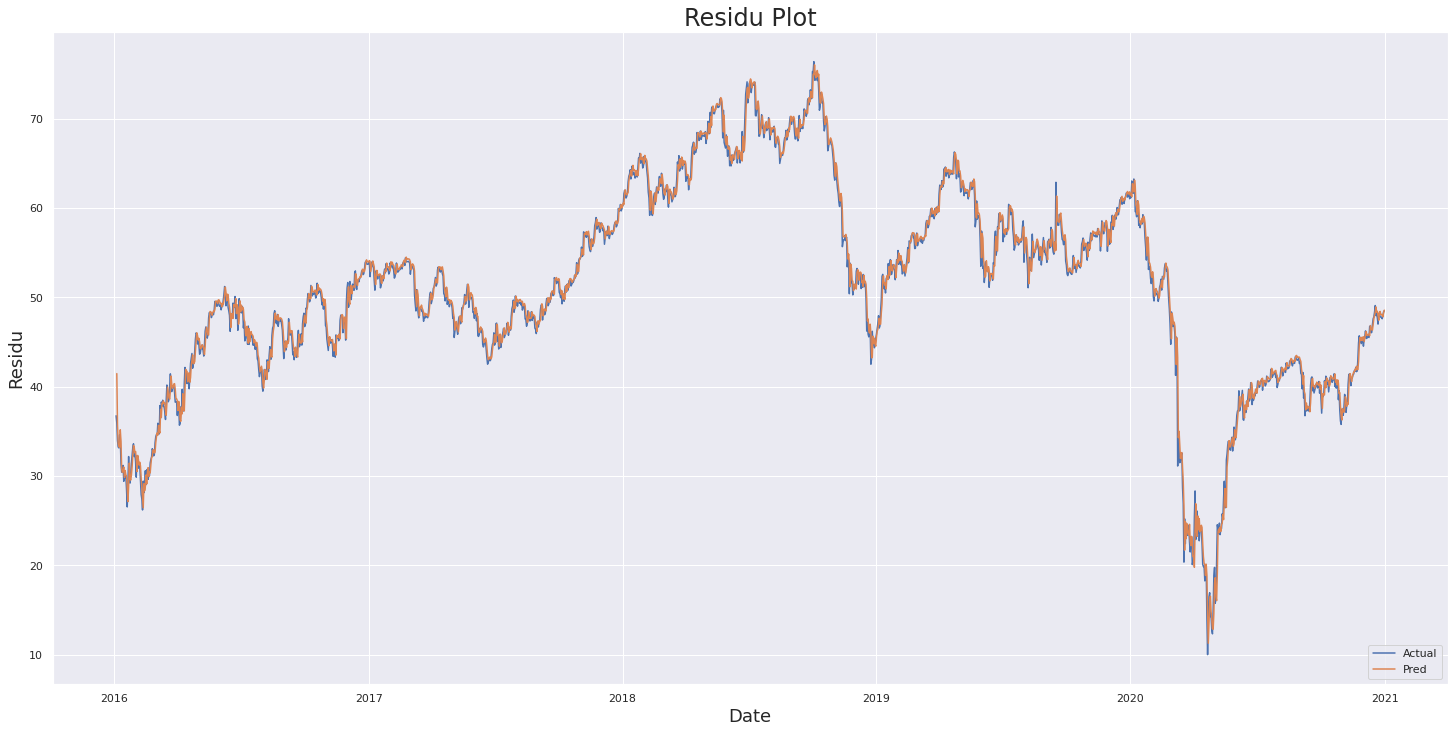

In [ ]:
plt.figure(figsize=(25,12))
plt.title('Residu Plot', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Residu', fontsize=18)
plt.plot(df_forecast['Price'])
plt.plot(df_forecast['Forecast'][1:])
plt.legend(['Actual', 'Pred'], loc='lower right')
plt.show()

## Final Output Prediction 1 Year Ahead using Hybrid ARIMA - BPNN

In [ ]:
df_output = pd.DataFrame(pred_uc.predicted_mean, columns=['Forecast_ARIMA'])
df_output.reset_index(inplace=True)
df_output['Forecast_BPNN'] = pd.DataFrame(forecast, columns=['Forecast_ARIMA'])
df_output['Forecast_Hybrid'] = df_output['Forecast_ARIMA'] + df_output['Forecast_BPNN']
df_output

,index,Forecast_ARIMA,Forecast_BPNN,Forecast_Hybrid
0,2021-01-01,48.403784,-5.447815,42.955969
1,2021-01-02,48.385964,-0.703022,47.682942
2,2021-01-03,48.378836,-0.023949,48.354887
3,2021-01-04,48.364051,0.251456,48.615507
4,2021-01-05,48.407162,0.271346,48.678508
...,...,...,...,...
360,2021-12-27,48.436265,0.234286,48.670551
361,2021-12-28,48.436265,0.260475,48.696740
362,2021-12-29,48.436265,0.270386,48.706651
363,2021-12-30,48.436265,0.271430,48.707695


In [ ]:
# set index dataset
df_output['Date']=pd.to_datetime(df_output['index'])
df_output.set_index('Date', inplace=True)
df_output = df_output.drop(columns='index')
df_output

,Forecast_ARIMA,Forecast_BPNN,Forecast_Hybrid
Date,,,
2021-01-01,48.403784,-5.447815,42.955969
2021-01-02,48.385964,-0.703022,47.682942
2021-01-03,48.378836,-0.023949,48.354887
2021-01-04,48.364051,0.251456,48.615507
2021-01-05,48.407162,0.271346,48.678508
...,...,...,...
2021-12-27,48.436265,0.234286,48.670551
2021-12-28,48.436265,0.260475,48.696740
2021-12-29,48.436265,0.270386,48.706651


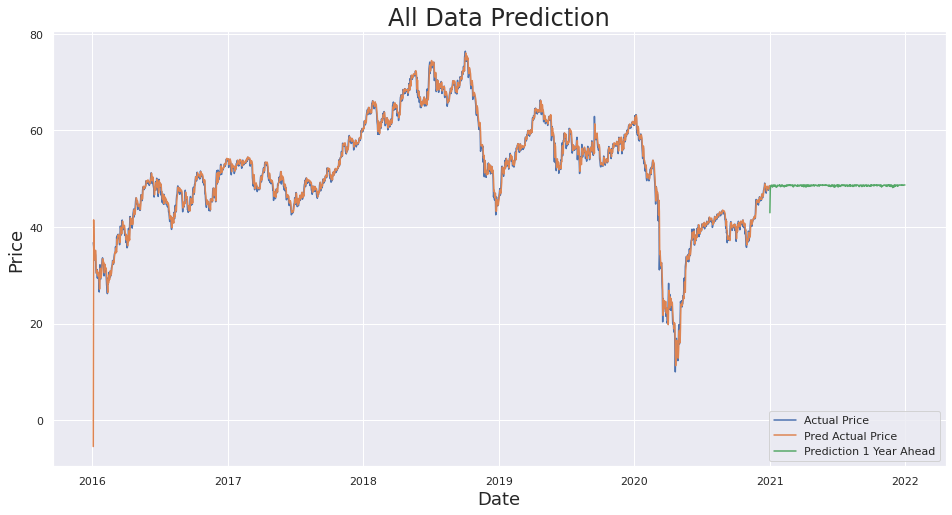

In [ ]:
plt.figure(figsize=(16,8))
plt.title('All Data Prediction', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(df)
plt.plot(df_forecast['Forecast'])
plt.plot(df_output['Forecast_Hybrid'])
plt.legend(['Actual Price', 'Pred Actual Price', 'Prediction 1 Year Ahead'], loc='lower right')
plt.show()

## Evaluating Model

In [ ]:
mape_hybrid = mape(df_forecast['Price'], df_forecast['Forecast'])
print("MAPE Hybrid ARIMA - BPNN: ", round(mape_hybrid,2), "%")

MAPE Hybrid ARIMA - BPNN:  1.87 %


In [ ]:
rmse_hybrid = rmse(df_forecast['Price'], df_forecast['Forecast'])
print("RMSE Hybrid ARIMA - BPNN: ", round(rmse_hybrid,2))

RMSE Hybrid ARIMA - BPNN:  1.51
